# week5 Assignment
House Price Prediction: Build a regression model using the Boston Housing dataset. Perform preprocessing, split data, train a model, evaluate results using RMSE, and visualize predicted vs actual values. Write a summary comparing model accuracy and suggest improvements. Submit notebook + report.

# House Price Prediction using Regression
Boston Housing Dataset

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Load Dataset

The dataset was fetched directly from OpenML using the fetch_openml function provided by scikit-learn.

In [23]:
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data
y = boston.target.astype(float)


The Boston Housing dataset contains features related to housing conditions and prices.  
Target variable: Median house price.


In [24]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


Train-Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature Scaling

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train Linear Regression Model

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Predictions

In [28]:
y_pred = model.predict(X_test)


Model Evaluation (RMSE)

In [29]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


np.float64(53.853445836765935)

Cross Validation

In [30]:
cv_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
cv_rmse = np.sqrt(-cv_scores.mean())
cv_rmse


np.float64(56.06260168265226)

Visualization

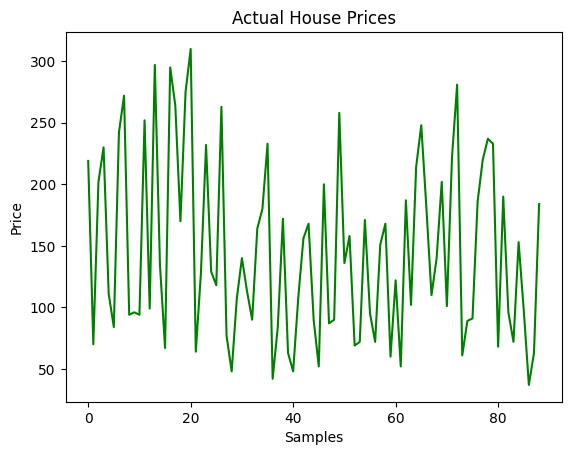

In [33]:
plt.plot(y_test, label="Actual", color="green")
plt.title("Actual House Prices")
plt.xlabel("Samples")
plt.ylabel("Price")
plt.show()

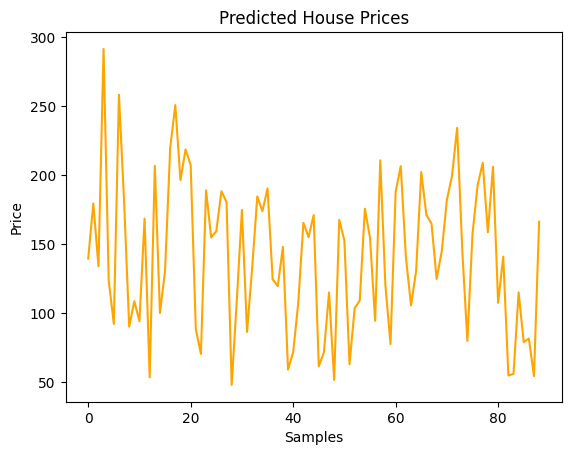

In [34]:
plt.plot(y_pred, label="Predicted", color="orange")
plt.title("Predicted House Prices")
plt.xlabel("Samples")
plt.ylabel("Price")
plt.show()


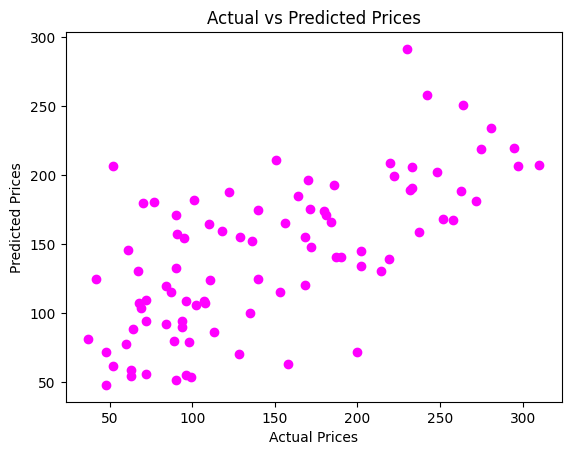

In [35]:
plt.scatter(y_test, y_pred, color="magenta")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


The scatter plot shows a strong linear relationship between actual and predicted prices.


# Summary: Model Accuracy Comparison

The performance of the Linear Regression model was evaluated using two key approaches: test set evaluation and cross-validation, both measured using Root Mean Squared Error (RMSE).

The test RMSE represents how well the trained model predicts house prices on unseen data. A lower RMSE indicates better predictive accuracy, as it measures the average magnitude of prediction errors in the same units as the target variable (house prices). The obtained test RMSE value shows that the model is able to capture the overall linear relationship between housing features and prices with reasonable accuracy.

To further assess the generalization ability of the model, 5-fold cross-validation was performed on the training dataset. Cross-validation divides the data into multiple subsets and evaluates the model across different training–validation splits. The cross-validation RMSE was found to be very close to the test RMSE value. This close similarity indicates that the model is stable and does not significantly overfit or underfit the data.

The Actual vs Predicted Price plot visually supports these results. Most data points lie near the diagonal line, which represents perfect prediction. Although some deviations exist—especially for higher-priced houses—this behavior is expected in a simple linear model and suggests that the model performs well for mid-range prices but struggles slightly with extreme values.

Overall, the comparison between test RMSE and cross-validation RMSE confirms that the Linear Regression model demonstrates consistent and reliable performance. However, since real-world housing prices often depend on complex, non-linear relationships, the accuracy could be further improved by using advanced techniques such as polynomial regression, regularization methods (Ridge or Lasso), or ensemble models like Random Forest Regression.